# Feature engineering & basic visualisation

### Importing electricity price for all years (2013-2021)

Oct-Dec 2020 and Jan-Sep 2021 are not yet final prices, but they are the prices that were paid by the market. Minor deviations can occur in the following months.

In [1]:
import pandas as pd
import numpy as np
pd.options.display.max_columns = None
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

In [2]:
!pwd

/home/dsc/CarpetaCompartida/TFM


In [3]:
path_2013 = "/home/dsc/CarpetaCompartida/TFM/Data/Precios de la electricidad/Definitivo_2013/2013/PFMDIASM_TOD_2013"
path_2014 = "/home/dsc/CarpetaCompartida/TFM/Data/Precios de la electricidad/Definitivo_2014/2014/PFMDIASM_TOD_2014"
path_2015 = "/home/dsc/CarpetaCompartida/TFM/Data/Precios de la electricidad/Definitivo_2015/2015/PFMDIASM_TOD_2015"
path_2016 = "/home/dsc/CarpetaCompartida/TFM/Data/Precios de la electricidad/Definitivo_2016/2016/PFMDIASM_TOD_2016"
path_2017 = "/home/dsc/CarpetaCompartida/TFM/Data/Precios de la electricidad/Definitivo_2017/2017/PFMDIASM_TOD_2017"
path_2018 = "/home/dsc/CarpetaCompartida/TFM/Data/Precios de la electricidad/Definitivos_2018/2018/PFMDIASM_TOD_2018"
path_2019 = "/home/dsc/CarpetaCompartida/TFM/Data/Precios de la electricidad/Definitivos_2019/2019/PFMDIASM_TOD_2019"
path_2020 = "/home/dsc/CarpetaCompartida/TFM/Data/Precios de la electricidad/Definitivos_2020/2020/PFMDIASM_TOD_2020"
path_2021 = "/home/dsc/CarpetaCompartida/TFM/Data/Precios de la electricidad/Provisionales_2021/2021/PFMDIASM_TOD_2021"

In [4]:
import glob

In [5]:
#Using glob.iglob() it returns an iterator that I can easily convert into a pandas Dataframe

data2013_import = glob.iglob(path_2013 + "*xls")
dataframes13 = (pd.read_excel(excel, dtype= str,parse_dates= True, engine= None, header = 3) for excel in data2013_import)
data2013  = pd.concat(dataframes13, ignore_index= True)

data2014_import = glob.iglob(path_2014 + "*xls")
dataframes14 = (pd.read_excel(excel, dtype= str,parse_dates= True, engine= None, header = 3) for excel in data2014_import)
data2014  = pd.concat(dataframes14, ignore_index= True)

data2015_import = glob.iglob(path_2015 + "*xls")
dataframes15 = (pd.read_excel(excel, dtype= str,parse_dates= True, engine= None, header = 3) for excel in data2015_import)
data2015  = pd.concat(dataframes15, ignore_index= True)

data2016_import = glob.iglob(path_2016 + "*xls")
dataframes16 = (pd.read_excel(excel, dtype= str,parse_dates= True, engine= None, header = 3) for excel in data2016_import)
data2016  = pd.concat(dataframes16, ignore_index= True)

data2017_import = glob.iglob(path_2017 + "*xls")
dataframes17 = (pd.read_excel(excel, dtype= str,parse_dates= True, engine= None, header = 3) for excel in data2017_import)
data2017  = pd.concat(dataframes17, ignore_index= True)

data2018_import = glob.iglob(path_2018 + "*xls")
dataframes18 = (pd.read_excel(excel, dtype= str,parse_dates= True, engine= None, header = 3) for excel in data2018_import)
data2018  = pd.concat(dataframes18, ignore_index= True)

data2019_import = glob.iglob(path_2019 + "*xls")
dataframes19 = (pd.read_excel(excel, dtype= str,parse_dates= True, engine= None, header = 3) for excel in data2019_import)
data2019  = pd.concat(dataframes19, ignore_index= True)

data2020_import = glob.iglob(path_2020 + "*xls")
dataframes20 = (pd.read_excel(excel, dtype= str,parse_dates= True, engine= None, header = 3) for excel in data2020_import)
data2020  = pd.concat(dataframes20, ignore_index= True)

data2021_import = glob.iglob(path_2021 + "*xls")
dataframes21 = (pd.read_excel(excel, dtype= str,parse_dates= True, engine= None, header = 3) for excel in data2021_import)
data2021  = pd.concat(dataframes21, ignore_index= True)


In [6]:
electricity_prices = data2013.append([data2014, data2015, data2016, data2017, data2018, data2019, data2020, data2021],
                                    ignore_index=True)
electricity_prices

,Periodo,Energía\n final \nMWh,Mercado \ndiario \n€/MWh,Mercado \nintradiario \n€/MWh,Restricciones\n€/MWh,Procesos \nOS \n€/MWh,Garantía potencia \nPagos capacidad\n€/MWh,Total\n€/MWh,Coste\ns.interrrumpibilidad
0,01/01/13 Martes,575111.397,33.31,0.43,6.08,2.49,5.11,47.42,NaN
1,02/01/13 Miércoles,681911.324,50.75,0.12,3.15,3.18,7.46,64.65,NaN
2,03/01/13 Jueves,724426.458,57.07,-0.13,1.92,3.47,7.34,69.67,NaN
3,04/01/13 Viernes,717141.532,61.31,-0.08,1.71,2.4,7.39,72.73,NaN
4,05/01/13 Sábado,682149.96,58.11,0.14,1.29,1.43,4.88,65.86,NaN
...,...,...,...,...,...,...,...,...,...
3190,26/09/21 Domingo,624704.121,159.19,-0.14,2.64,1.14,NaN,162.84,NaN
3191,27/09/21 Lunes,684730.138,176.13,-0.25,2.23,0.54,0.38,179.04,NaN
3192,28/09/21 Martes,683173.232,182.57,-0.11,1.79,0.74,0.39,185.38,NaN
3193,29/09/21 Miércoles,698517.52,190.62,-0.28,3.99,1.46,0.38,196.18,NaN


In [7]:
type(electricity_prices)

pandas.core.frame.DataFrame

In [8]:
electricity_prices[["Date", "Day"]] = electricity_prices.Periodo.str.split(expand= True)

In [9]:
electricity_prices.head()

,Periodo,Energía\n final \nMWh,Mercado \ndiario \n€/MWh,Mercado \nintradiario \n€/MWh,Restricciones\n€/MWh,Procesos \nOS \n€/MWh,Garantía potencia \nPagos capacidad\n€/MWh,Total\n€/MWh,Coste\ns.interrrumpibilidad,Date,Day
0,01/01/13 Martes,575111.397,33.31,0.43,6.08,2.49,5.11,47.42,NaN,01/01/13,Martes
1,02/01/13 Miércoles,681911.324,50.75,0.12,3.15,3.18,7.46,64.65,NaN,02/01/13,Miércoles
2,03/01/13 Jueves,724426.458,57.07,-0.13,1.92,3.47,7.34,69.67,NaN,03/01/13,Jueves
3,04/01/13 Viernes,717141.532,61.31,-0.08,1.71,2.4,7.39,72.73,NaN,04/01/13,Viernes
4,05/01/13 Sábado,682149.96,58.11,0.14,1.29,1.43,4.88,65.86,NaN,05/01/13,Sábado


In [10]:
electricity_prices["Date"] = pd.to_datetime(electricity_prices["Date"], dayfirst=True)
electricity_prices.head()

,Periodo,Energía\n final \nMWh,Mercado \ndiario \n€/MWh,Mercado \nintradiario \n€/MWh,Restricciones\n€/MWh,Procesos \nOS \n€/MWh,Garantía potencia \nPagos capacidad\n€/MWh,Total\n€/MWh,Coste\ns.interrrumpibilidad,Date,Day
0,01/01/13 Martes,575111.397,33.31,0.43,6.08,2.49,5.11,47.42,NaN,2013-01-01,Martes
1,02/01/13 Miércoles,681911.324,50.75,0.12,3.15,3.18,7.46,64.65,NaN,2013-01-02,Miércoles
2,03/01/13 Jueves,724426.458,57.07,-0.13,1.92,3.47,7.34,69.67,NaN,2013-01-03,Jueves
3,04/01/13 Viernes,717141.532,61.31,-0.08,1.71,2.4,7.39,72.73,NaN,2013-01-04,Viernes
4,05/01/13 Sábado,682149.96,58.11,0.14,1.29,1.43,4.88,65.86,NaN,2013-01-05,Sábado


### Comparing provisional and definitive prices (2019)

In order to make sure that is fine using provisional prices for 2021 and some 2020 months, let's check how much did the provisional and definitive prices changed in 2019

In [11]:
path_2019_prov = "/home/dsc/CarpetaCompartida/TFM/Data/Precios de la electricidad/Provisionales_2019/2019 Provisionales/PFMDIASM_TOD_2019"

data2019_prov_import = glob.iglob(path_2019_prov + "*xls")
dataframes19_prov = (pd.read_excel(excel, dtype= str,parse_dates= True, engine= None, header = 3) for excel in data2019_prov_import)
data2019_prov  = pd.concat(dataframes19_prov, ignore_index= True)

In [12]:
data2019_prov.drop(["Energía\n final \nMWh", "Mercado \ndiario \n€/MWh", "Mercado \nintradiario \n€/MWh", "Restricciones\n€/MWh",
                  "Procesos \nOS \n€/MWh", "Garantía potencia \nPagos capacidad\n€/MWh", "Coste\ns.interrrumpibilidad"],
                  inplace = True, axis = 1)

In [13]:
prices2019_prov_def = data2019_prov.merge(right= electricity_prices, on= "Periodo", how= "left")
prices2019_prov_def.head()

,Periodo,Total\n€/MWh_x,Energía\n final \nMWh,Mercado \ndiario \n€/MWh,Mercado \nintradiario \n€/MWh,Restricciones\n€/MWh,Procesos \nOS \n€/MWh,Garantía potencia \nPagos capacidad\n€/MWh,Total\n€/MWh_y,Coste\ns.interrrumpibilidad,Date,Day
0,01/01/19 Martes,69.11,589313.894,63.68,-0.13,2.51,0.19,2.29,69.19,0.65,2019-01-01,Martes
1,02/01/19 Miércoles,67.42,760230.355,61.5,-0.12,1.55,0.39,3.34,67.31,0.65,2019-01-02,Miércoles
2,03/01/19 Jueves,70.76,769341.834,65.06,0.05,0.85,0.55,3.42,70.63,0.68,2019-01-03,Jueves
3,04/01/19 Viernes,72.96,784474.379,67.56,0,0.46,0.77,3.36,72.82,0.68,2019-01-04,Viernes
4,05/01/19 Sábado,68.91,702469.329,65.42,-0.02,0.38,0.27,2.15,68.88,0.68,2019-01-05,Sábado


In [14]:
prices2019_prov_def.drop(["Energía\n final \nMWh", "Mercado \ndiario \n€/MWh", "Mercado \nintradiario \n€/MWh", "Restricciones\n€/MWh",
                  "Procesos \nOS \n€/MWh", "Garantía potencia \nPagos capacidad\n€/MWh", "Coste\ns.interrrumpibilidad"],
                  inplace = True, axis = 1)

prices2019_prov_def.rename(columns= {"Total\n€/MWh_x": "Total€MWh_Provisional", "Total\n€/MWh_y": "Total€MWh_Definitivo"},
                          inplace= True)

In [15]:
prices2019_prov_def.head()

,Periodo,Total€MWh_Provisional,Total€MWh_Definitivo,Date,Day
0,01/01/19 Martes,69.11,69.19,2019-01-01,Martes
1,02/01/19 Miércoles,67.42,67.31,2019-01-02,Miércoles
2,03/01/19 Jueves,70.76,70.63,2019-01-03,Jueves
3,04/01/19 Viernes,72.96,72.82,2019-01-04,Viernes
4,05/01/19 Sábado,68.91,68.88,2019-01-05,Sábado


In [16]:
prices2019_prov_def["Total€MWh_Provisional"] = pd.to_numeric(prices2019_prov_def["Total€MWh_Provisional"], downcast="float")
prices2019_prov_def["Total€MWh_Definitivo"] = pd.to_numeric(prices2019_prov_def["Total€MWh_Definitivo"], downcast="float")

In [17]:
prices2019_prov_def['Difference_Prov_Def'] = prices2019_prov_def.apply(
    lambda x: x['Total€MWh_Provisional'] - x['Total€MWh_Definitivo'], axis = 1)

In [18]:
prices2019_prov_def.head()

,Periodo,Total€MWh_Provisional,Total€MWh_Definitivo,Date,Day,Difference_Prov_Def
0,01/01/19 Martes,69.110001,69.190002,2019-01-01,Martes,-0.080002
1,02/01/19 Miércoles,67.419998,67.309998,2019-01-02,Miércoles,0.110001
2,03/01/19 Jueves,70.760002,70.629997,2019-01-03,Jueves,0.130005
3,04/01/19 Viernes,72.959999,72.820000,2019-01-04,Viernes,0.139999
4,05/01/19 Sábado,68.910004,68.879997,2019-01-05,Sábado,0.030006


In [19]:
#The mean of the difference between provisional and definitive prices is basically 0.
#Therefore, I think it's fine to use the provisional prices for the last months of 2020 and 2021.

prices2019_prov_def.describe()

,Total€MWh_Provisional,Total€MWh_Definitivo,Difference_Prov_Def
count,365.000000,365.000000,365.000000
mean,52.533230,52.457588,0.075644
std,9.292079,9.271208,0.073376
min,6.380000,6.360000,-0.639999
25%,47.500000,47.410000,0.040001
50%,52.799999,52.730000,0.070000
75%,58.130001,58.049999,0.119999
max,74.580002,74.440002,0.230003


### Importing the Brent crude oil future prices

In [20]:
brent_prices = pd.read_csv("/home/dsc/CarpetaCompartida/TFM/Data/Precios de la electricidad/Datos_históricos_Futuros_petróleo_Brent.csv")
brent_prices.head()

,Fecha,Último,Apertura,Máximo,Mínimo,Vol.,% var.
0,12.11.2021,"81,99","82,85","82,85","81,26",-,"-1,06%"
1,11.11.2021,"82,87","82,85","83,44","81,66","336,14K","0,28%"
2,10.11.2021,"82,64","84,99","85,50","82,08","366,31K","-2,52%"
3,09.11.2021,"84,78","83,47","85,30","83,16","346,57K","1,62%"
4,08.11.2021,"83,43","82,58","84,00","82,53","269,60K","0,83%"


In [21]:
brent_prices["Fecha"] = pd.to_datetime(brent_prices["Fecha"], dayfirst=True)

In [22]:
#Column "Vol." is the number of contracts that were sold that day
brent_prices

,Fecha,Último,Apertura,Máximo,Mínimo,Vol.,% var.
0,2021-11-12,"81,99","82,85","82,85","81,26",-,"-1,06%"
1,2021-11-11,"82,87","82,85","83,44","81,66","336,14K","0,28%"
2,2021-11-10,"82,64","84,99","85,50","82,08","366,31K","-2,52%"
3,2021-11-09,"84,78","83,47","85,30","83,16","346,57K","1,62%"
4,2021-11-08,"83,43","82,58","84,00","82,53","269,60K","0,83%"
...,...,...,...,...,...,...,...
2285,2013-01-08,"111,94","111,42","112,47","111,12","194,00K","0,48%"
2286,2013-01-07,"111,40","111,42","111,69","110,54","203,50K","0,08%"
2287,2013-01-04,"111,31","111,72","111,78","110,38","191,33K","-0,74%"
2288,2013-01-03,"112,14","112,20","112,42","111,63","190,29K","-0,29%"


In [23]:
brent_prices.dtypes

Fecha       datetime64[ns]
Último              object
Apertura            object
Máximo              object
Mínimo              object
Vol.                object
% var.              object
dtype: object

In [24]:
brent_prices.rename(columns={"Fecha":"Date"}, inplace= True)

In [25]:
electricity_brent = pd.merge(electricity_prices, brent_prices, on= "Date", sort=False, indicator= True)
electricity_brent.head()

,Periodo,Energía\n final \nMWh,Mercado \ndiario \n€/MWh,Mercado \nintradiario \n€/MWh,Restricciones\n€/MWh,Procesos \nOS \n€/MWh,Garantía potencia \nPagos capacidad\n€/MWh,Total\n€/MWh,Coste\ns.interrrumpibilidad,Date,Day,Último,Apertura,Máximo,Mínimo,Vol.,% var.,_merge
0,02/01/13 Miércoles,681911.324,50.75,0.12,3.15,3.18,7.46,64.65,NaN,2013-01-02,Miércoles,"112,47","111,50","112,90","111,27","183,14K","1,22%",both
1,03/01/13 Jueves,724426.458,57.07,-0.13,1.92,3.47,7.34,69.67,NaN,2013-01-03,Jueves,"112,14","112,20","112,42","111,63","190,29K","-0,29%",both
2,04/01/13 Viernes,717141.532,61.31,-0.08,1.71,2.4,7.39,72.73,NaN,2013-01-04,Viernes,"111,31","111,72","111,78","110,38","191,33K","-0,74%",both
3,07/01/13 Lunes,707896.584,63.42,-0.18,2.45,2.57,7.26,75.52,NaN,2013-01-07,Lunes,"111,40","111,42","111,69","110,54","203,50K","0,08%",both
4,08/01/13 Martes,792239.818,69,0.08,1.21,1.94,7.43,79.65,NaN,2013-01-08,Martes,"111,94","111,42","112,47","111,12","194,00K","0,48%",both


In [26]:
brent_prices.to_csv("historic_brent_prices.csv", sep= ";", index = True)

In [27]:
#In the brent_prices DataFrame, we're missing Saturday and Sunday prices (and bank holidays) 
#This is because the Brent Crude Futures Markets does not operate during weekends.
#So Friday prices should also be Saturday and Sunday prices.

electricity_brent["Day"].unique()

array(['Miércoles', 'Jueves', 'Viernes', 'Lunes', 'Martes'], dtype=object)

In [28]:
date_day = electricity_prices[["Date", "Day"]]
date_day

,Date,Day
0,2013-01-01,Martes
1,2013-01-02,Miércoles
2,2013-01-03,Jueves
3,2013-01-04,Viernes
4,2013-01-05,Sábado
...,...,...
3190,2021-09-26,Domingo
3191,2021-09-27,Lunes
3192,2021-09-28,Martes
3193,2021-09-29,Miércoles


In [29]:
brent_prices_allweek = pd.merge(date_day, brent_prices, on= "Date", indicator = True, how= "left")
brent_prices_allweek

,Date,Day,Último,Apertura,Máximo,Mínimo,Vol.,% var.,_merge
0,2013-01-01,Martes,NaN,NaN,NaN,NaN,NaN,NaN,left_only
1,2013-01-02,Miércoles,"112,47","111,50","112,90","111,27","183,14K","1,22%",both
2,2013-01-03,Jueves,"112,14","112,20","112,42","111,63","190,29K","-0,29%",both
3,2013-01-04,Viernes,"111,31","111,72","111,78","110,38","191,33K","-0,74%",both
4,2013-01-05,Sábado,NaN,NaN,NaN,NaN,NaN,NaN,left_only
...,...,...,...,...,...,...,...,...,...
3190,2021-09-26,Domingo,NaN,NaN,NaN,NaN,NaN,NaN,left_only
3191,2021-09-27,Lunes,"79,53","78,25","79,90","78,21","231,13K","1,84%",both
3192,2021-09-28,Martes,"79,09","79,40","80,75","78,10","132,33K","-0,55%",both
3193,2021-09-29,Miércoles,"78,64","78,25","79,40","77,50","97,97K","-0,57%",both


In [30]:
#There were 936 Saturday, Sunday and bank holidays between 2013 and September 2020 in Spain
np.count_nonzero(brent_prices_allweek["_merge"] != "both")

936

In [31]:
#I'm going to use Friday's price for the weekend (as this is the latest price) and the previous day's price for the bank holidays
brent_prices_allweek = brent_prices_allweek.fillna(method= "ffill")
brent_prices_allweek

,Date,Day,Último,Apertura,Máximo,Mínimo,Vol.,% var.,_merge
0,2013-01-01,Martes,NaN,NaN,NaN,NaN,NaN,NaN,left_only
1,2013-01-02,Miércoles,"112,47","111,50","112,90","111,27","183,14K","1,22%",both
2,2013-01-03,Jueves,"112,14","112,20","112,42","111,63","190,29K","-0,29%",both
3,2013-01-04,Viernes,"111,31","111,72","111,78","110,38","191,33K","-0,74%",both
4,2013-01-05,Sábado,"111,31","111,72","111,78","110,38","191,33K","-0,74%",left_only
...,...,...,...,...,...,...,...,...,...
3190,2021-09-26,Domingo,"78,09","77,26","78,24","76,85","163,23K","1,09%",left_only
3191,2021-09-27,Lunes,"79,53","78,25","79,90","78,21","231,13K","1,84%",both
3192,2021-09-28,Martes,"79,09","79,40","80,75","78,10","132,33K","-0,55%",both
3193,2021-09-29,Miércoles,"78,64","78,25","79,40","77,50","97,97K","-0,57%",both


In [32]:
#The 1st of January of 2013 still has NaN values, but I don't have historical data before that.
#Therefore, I'll drop that row
brent_prices_allweek.isna().sum()

Date        0
Day         0
Último      1
Apertura    1
Máximo      1
Mínimo      1
Vol.        1
% var.      1
_merge      0
dtype: int64

In [33]:
brent_prices_allweek = brent_prices_allweek.dropna()
brent_prices_allweek

,Date,Day,Último,Apertura,Máximo,Mínimo,Vol.,% var.,_merge
1,2013-01-02,Miércoles,"112,47","111,50","112,90","111,27","183,14K","1,22%",both
2,2013-01-03,Jueves,"112,14","112,20","112,42","111,63","190,29K","-0,29%",both
3,2013-01-04,Viernes,"111,31","111,72","111,78","110,38","191,33K","-0,74%",both
4,2013-01-05,Sábado,"111,31","111,72","111,78","110,38","191,33K","-0,74%",left_only
5,2013-01-06,Domingo,"111,31","111,72","111,78","110,38","191,33K","-0,74%",left_only
...,...,...,...,...,...,...,...,...,...
3190,2021-09-26,Domingo,"78,09","77,26","78,24","76,85","163,23K","1,09%",left_only
3191,2021-09-27,Lunes,"79,53","78,25","79,90","78,21","231,13K","1,84%",both
3192,2021-09-28,Martes,"79,09","79,40","80,75","78,10","132,33K","-0,55%",both
3193,2021-09-29,Miércoles,"78,64","78,25","79,40","77,50","97,97K","-0,57%",both


In [34]:
#Now that we have the Brent prices for all days of the week, let's merge both datasets again
electricity_brent = pd.merge(electricity_prices, brent_prices_allweek, on= "Date", sort=False)
electricity_brent

,Periodo,Energía\n final \nMWh,Mercado \ndiario \n€/MWh,Mercado \nintradiario \n€/MWh,Restricciones\n€/MWh,Procesos \nOS \n€/MWh,Garantía potencia \nPagos capacidad\n€/MWh,Total\n€/MWh,Coste\ns.interrrumpibilidad,Date,Day_x,Day_y,Último,Apertura,Máximo,Mínimo,Vol.,% var.,_merge
0,02/01/13 Miércoles,681911.324,50.75,0.12,3.15,3.18,7.46,64.65,NaN,2013-01-02,Miércoles,Miércoles,"112,47","111,50","112,90","111,27","183,14K","1,22%",both
1,03/01/13 Jueves,724426.458,57.07,-0.13,1.92,3.47,7.34,69.67,NaN,2013-01-03,Jueves,Jueves,"112,14","112,20","112,42","111,63","190,29K","-0,29%",both
2,04/01/13 Viernes,717141.532,61.31,-0.08,1.71,2.4,7.39,72.73,NaN,2013-01-04,Viernes,Viernes,"111,31","111,72","111,78","110,38","191,33K","-0,74%",both
3,05/01/13 Sábado,682149.96,58.11,0.14,1.29,1.43,4.88,65.86,NaN,2013-01-05,Sábado,Sábado,"111,31","111,72","111,78","110,38","191,33K","-0,74%",left_only
4,06/01/13 Domingo,647854.785,58.01,0,2.27,2.16,5.02,67.45,NaN,2013-01-06,Domingo,Domingo,"111,31","111,72","111,78","110,38","191,33K","-0,74%",left_only
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3189,26/09/21 Domingo,624704.121,159.19,-0.14,2.64,1.14,NaN,162.84,NaN,2021-09-26,Domingo,Domingo,"78,09","77,26","78,24","76,85","163,23K","1,09%",left_only
3190,27/09/21 Lunes,684730.138,176.13,-0.25,2.23,0.54,0.38,179.04,NaN,2021-09-27,Lunes,Lunes,"79,53","78,25","79,90","78,21","231,13K","1,84%",both
3191,28/09/21 Martes,683173.232,182.57,-0.11,1.79,0.74,0.39,185.38,NaN,2021-09-28,Martes,Martes,"79,09","79,40","80,75","78,10","132,33K","-0,55%",both
3192,29/09/21 Miércoles,698517.52,190.62,-0.28,3.99,1.46,0.38,196.18,NaN,2021-09-29,Miércoles,Miércoles,"78,64","78,25","79,40","77,50","97,97K","-0,57%",both


In [35]:
#Let's get rid of some columns we don't need
electricity_brent = electricity_brent.drop(columns= ["Day_y", "_merge", "% var."])
electricity_brent.rename(columns={"Day_x":"Day"}, inplace= True)

### Now, let's start looking at the weather data

The first file that we'll look at, contains a list of weather stations across Spain (with their specific code) that will allow us to choose the weather stations data that we will use

In [36]:
#The encoding = "latin1" is used so "special characters" like ñ are read well

listado_estaciones = pd.read_csv("/home/dsc/CarpetaCompartida/TFM/Data/Precios de la electricidad/Aemet2021-10-Por-Estaciones/ListadoEstaciones.csv", 
                                names =["Identificador_est", "Nombre_est", "Municipio", "Provincia", "Altura", "Longitud", "Latitud"],
                                         header= 0, dtype = str, engine= "python", sep=";", error_bad_lines= False,
                                encoding= "latin1")
listado_estaciones

,Identificador_est,Nombre_est,Municipio,Provincia,Altura,Longitud,Latitud
0,1387,A Coruña,"Coruña, A",A Coruña,58,432157N,082517W
1,1387E,A Coruña Aeropuerto,Culleredo,A Coruña,98,431825N,082219W
2,1390X,"Carballo, Depuradora",Carballo,A Coruña,98,431213N,084239W
3,1393,Cabo Vilan,Camariñas,A Coruña,50,430938N,091239W
4,1399,Vimianzo,Vimianzo,A Coruña,287,430327N,090249W
...,...,...,...,...,...,...,...
844,3344E,Villanueva de la Cañada,Villanueva de la Cañada,Madrid,641,402615N,040119W
845,C316I,Arure,Valle Gran Rey,Santa Cruz de Tenerife,916,280742N,171854W
846,5788X,"Tomares, Zaudín",Tomares,Sevilla,84,372142N,060335W
847,B228D,"Palma, Dic de l'Oest",Palma,Illes Balears,7,393309N,023821E


In [37]:
#Let's have a look at the stations in Madrid, for example
in_madrid = listado_estaciones["Provincia"] == "Madrid"
estaciones_madrid = listado_estaciones[in_madrid]
estaciones_madrid

,Identificador_est,Nombre_est,Municipio,Provincia,Altura,Longitud,Latitud
410,2462,Puerto de Navacerrada,Cercedilla,Madrid,1894,404735N,040038W
411,3100B,Aranjuez,Aranjuez,Madrid,540,400402N,033246W
412,3104Y,Rascafría,Rascafría,Madrid,1159,405323N,035318W
413,3110C,Buitrago del Lozoya,Buitrago del Lozoya,Madrid,1026,410025N,033649W
414,3111D,Somosierra,Somosierra,Madrid,1450,410808N,033449W
415,3125Y,San Sebastián de Los Reyes,San Sebastián de los Reyes,Madrid,671,403412N,033806W
416,3126Y,"Madrid, El Goloso",Madrid,Madrid,740,403341N,034243W
417,3129,Madrid Aeropuerto,Madrid,Madrid,609,402800N,033320W
418,3170Y,Alcala de Henares,Alcalá de Henares,Madrid,605,403142N,031723W
419,3182Y,Arganda del Rey,Arganda del Rey,Madrid,533,401842N,032952W


In [38]:
#Let's get all the province names in a list
provincias = listado_estaciones["Provincia"].unique()
provincias = list(provincias)
provincias

['A Coruña',
 'Albacete',
 'Alacant/Alicante',
 'Almería',
 'Araba/Álava',
 'Asturias',
 'Ávila',
 'Badajoz',
 'Barcelona',
 'Bizkaia',
 'Burgos',
 'Cáceres',
 'Cádiz',
 'Cantabria',
 'Castelló/Castellón',
 'Ceuta',
 'Ciudad Real',
 'Córdoba',
 'Cuenca',
 'Gipuzkoa',
 'Girona',
 'Granada',
 'Guadalajara',
 'Huelva',
 'Huesca',
 'Las Palmas',
 'León',
 'Lleida',
 'Lugo',
 'Madrid',
 'Málaga',
 'Melilla',
 'Murcia',
 'Navarra',
 'Illes Balears',
 'Jaén',
 'La Rioja',
 'Santa Cruz de Tenerife',
 'Zaragoza',
 'Ourense',
 'Palencia',
 'Pontevedra',
 'Salamanca',
 'Segovia',
 'Sevilla',
 'Soria',
 'Tarragona',
 'Teruel',
 'Toledo',
 'València/Valencia',
 'Valladolid',
 'Zamora']

I want to get all the weather stations identification codes by province, so then I can do a median average by province. After that, the plan is to do a weighted average by each province population so the values for those provinces with more inhabitants value more.

After trying to use groupby in different ways, and because of how the data is storage in the files, I've found that the easiest way to do this might be collecting all data from all separate files by station in one file and then in that file add a column with the province name. After that, I could do the median average by province that I mentioned before.

In [39]:
listado_estaciones.drop(columns= ["Municipio", "Altura", "Longitud", "Latitud"], inplace= True)
listado_estaciones

,Identificador_est,Nombre_est,Provincia
0,1387,A Coruña,A Coruña
1,1387E,A Coruña Aeropuerto,A Coruña
2,1390X,"Carballo, Depuradora",A Coruña
3,1393,Cabo Vilan,A Coruña
4,1399,Vimianzo,A Coruña
...,...,...,...
844,3344E,Villanueva de la Cañada,Madrid
845,C316I,Arure,Santa Cruz de Tenerife
846,5788X,"Tomares, Zaudín",Sevilla
847,B228D,"Palma, Dic de l'Oest",Illes Balears


In [40]:
#grouped_df = listado_estaciones.groupby(by = ["Provincia"])

#for provincia in provincias:
#    
#    by_province = grouped_df.get_group(provincia)
#    
#    print(by_province)
    

In [41]:
%%time

weather_data_import = glob.iglob("/home/dsc/CarpetaCompartida/TFM/Data/Precios de la electricidad/Aemet2021-10-Por-Estaciones/DatosEstaciones - 2021-10/*csv")
dataframeweather = (pd.read_csv(csv, dtype= str,parse_dates= True, dayfirst= True, engine= None, header = 0,
                                cache_dates= True,skip_blank_lines= False, sep = ";") for csv in weather_data_import)
all_weather_stations  = pd.concat(dataframeweather, ignore_index= True)

CPU times: user 4.02 s, sys: 1.26 s, total: 5.28 s
Wall time: 6.28 s


In [42]:
all_weather_stations.head()

,Id,Fecha,Tmax,HTmax,Tmin,HTmin,Tmed,Racha,HRacha,Vmax,HVmax,TPrec,Prec1,Prec2,Prec3,Prec4
0,C659H,2013-05-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,C659H,2013-05-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,C659H,2013-07-03,22.2,17:50,19.1,07:20,20.7,42,14:00,27,14:00,0,0,0,0,0
3,C659H,2013-07-04,21.9,12:30,19.0,22:40,20.4,47,15:10,27,15:10,0,0,0,0,0
4,C659H,2013-07-05,22.5,14:40,19.6,00:00,21.1,54,14:50,32,14:30,0,0,0,0,0


In [43]:
all_weather_stations.rename(columns={"Id": "Identificador_est"}, inplace= True)

In [44]:
#Let's now add the Province name to the dataframe with all the weather data
all_weather_stations = pd.merge(listado_estaciones, all_weather_stations, on= "Identificador_est", sort=False, 
                                indicator= True)
all_weather_stations.head()

,Identificador_est,Nombre_est,Provincia,Fecha,Tmax,HTmax,Tmin,HTmin,Tmed,Racha,HRacha,Vmax,HVmax,TPrec,Prec1,Prec2,Prec3,Prec4,_merge
0,1387,A Coruña,A Coruña,2013-05-07,19.7,13:30,15.0,00:00,17.4,66,19:10,31,14:50,1.2,1,0,0.2,0,both
1,1387,A Coruña,A Coruña,2013-05-08,18.1,14:00,12.8,21:50,15.5,41,00:40,27,14:50,0,0,0,0,0,both
2,1387,A Coruña,A Coruña,2013-05-09,15.1,15:20,11.4,09:30,13.3,27,09:10,20,13:30,0,0,0,0,0,both
3,1387,A Coruña,A Coruña,2013-05-10,15.5,15:00,8.2,07:10,11.8,28,16:10,19,16:10,0,0,0,0,0,both
4,1387,A Coruña,A Coruña,2013-05-11,15.7,11:50,8.7,07:20,12.2,27,20:20,20,13:30,0,0,0,0,0,both


In [45]:
#Thankfully, all the stations' id were written exaclty the same in both files.
np.count_nonzero(all_weather_stations["_merge"] != "both")

0

Firstly, I'm going to remove all the columns that we don't need. Also, I'll need to see whether there are any NaN values and what to do with them and also convert the Date column to date type and the number columns to numbers as now everything is saved as str

In [46]:
all_weather_stations = all_weather_stations.drop({"HTmax", "HTmin", "Racha", "HRacha", 
                                                        "HVmax", "Prec1", "Prec2", "Prec3", "Prec4", "_merge" },
                                                       axis = 1)

In [47]:
all_weather_stations.isnull().any()

Identificador_est    False
Nombre_est           False
Provincia            False
Fecha                False
Tmax                  True
Tmin                  True
Tmed                  True
Vmax                  True
TPrec                 True
dtype: bool

In [48]:
all_weather_stations.isnull().sum()

Identificador_est         0
Nombre_est                0
Provincia                 0
Fecha                     0
Tmax                 183990
Tmin                 183990
Tmed                 183990
Vmax                 509949
TPrec                210118
dtype: int64

In [49]:
#Here we can see that sometimes, it's missing the whole day data. In other instances, it's one or some of the variables.
nan_rows = all_weather_stations[all_weather_stations.isnull().any(1)]
nan_rows.head()

,Identificador_est,Nombre_est,Provincia,Fecha,Tmax,Tmin,Tmed,Vmax,TPrec
6,1387,A Coruña,A Coruña,2013-05-13,15.1,10.9,13,NaN,NaN
41,1387,A Coruña,A Coruña,2013-06-17,NaN,NaN,NaN,NaN,NaN
42,1387,A Coruña,A Coruña,2013-06-18,17.2,12.5,14.9,NaN,7.8
72,1387,A Coruña,A Coruña,2013-07-18,25.4,16.1,20.8,NaN,NaN
100,1387,A Coruña,A Coruña,2013-08-15,NaN,NaN,NaN,NaN,NaN


What I'm going to do is check if the first row of each weather station have any NaN value. If this is not the case, I think a good idea to fill the NaN values is using the Foward Fill and use the latest valid observation, as this will be from the same weather stations and also, because the rows are in chronological order, weather conditions would also have been similar between days (or at least I think it's a fair assumption).

In [50]:
weather_data_import = glob.iglob("/home/dsc/CarpetaCompartida/TFM/Data/Precios de la electricidad/Aemet2021-10-Por-Estaciones/DatosEstaciones - 2021-10/*csv")
dataframeweatherfirstrow = (pd.read_csv(csv, dtype= str,parse_dates= True, dayfirst= True, engine= None, header = 0,
                                cache_dates= True,skip_blank_lines= False, sep = ";",
                                       nrows= 1) for csv in weather_data_import)
weather_first_row = pd.concat(dataframeweatherfirstrow, ignore_index= True)

In [51]:
weather_first_row = weather_first_row.drop({"HTmax", "HTmin", "Racha", "HRacha", 
                                                        "HVmax", "Prec1", "Prec2", "Prec3", "Prec4"},
                                                       axis = 1)
weather_first_row

,Id,Fecha,Tmax,Tmin,Tmed,Vmax,TPrec
0,C659H,2013-05-07,NaN,NaN,NaN,NaN,NaN
1,C659M,2013-11-05,24.7,20.9,22.8,9,0
2,C665T,2013-05-07,29.7,14.7,22.2,14,0
3,C668V,2017-10-10,NaN,NaN,NaN,NaN,NaN
4,C669B,2013-05-07,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
845,1341B,2013-05-07,20.6,14.8,17.7,58,0.2
846,1342X,2013-05-07,21.3,16.0,18.6,37,0.2
847,1344X,2013-05-07,21.0,14.4,17.7,NaN,5.4
848,1347T,2013-05-07,20.6,15.8,18.2,NaN,0.2


In [52]:
#Let's check how many files start with all NaN values
all_nan = weather_first_row[weather_first_row.isnull().any(axis=1)]
all_nan

,Id,Fecha,Tmax,Tmin,Tmed,Vmax,TPrec
0,C659H,2013-05-07,NaN,NaN,NaN,NaN,NaN
3,C668V,2017-10-10,NaN,NaN,NaN,NaN,NaN
4,C669B,2013-05-07,NaN,NaN,NaN,NaN,NaN
6,C839I,2013-05-07,NaN,NaN,NaN,NaN,NaN
16,9946X,2013-05-07,25.0,12.9,18.9,NaN,0
...,...,...,...,...,...,...,...
817,1159,2013-05-07,NaN,NaN,NaN,NaN,NaN
821,1178Y,2013-05-07,NaN,NaN,NaN,NaN,NaN
829,1212E,2013-05-07,NaN,NaN,NaN,16,10.9
847,1344X,2013-05-07,21.0,14.4,17.7,NaN,5.4


Having had a look at this, and after checking some of the individual files, I think the best idea would be drop all the rows with NaN values. I don't think this will cause any dramatic impact in my models, as after this I'm going to do the mean by province. Therefore, even if data is missing from some weather stations for some dates, it should be there from the others. 

Also, after that I need to do the weighted average by population to get to a single row by day so I think that at this point is better not to start filling gaps with data that might not be accurate for those days.

In [53]:
all_weather_stations.dropna(axis=0, how= "any", inplace= True)
all_weather_stations.head()

,Identificador_est,Nombre_est,Provincia,Fecha,Tmax,Tmin,Tmed,Vmax,TPrec
0,1387,A Coruña,A Coruña,2013-05-07,19.7,15.0,17.4,31,1.2
1,1387,A Coruña,A Coruña,2013-05-08,18.1,12.8,15.5,27,0
2,1387,A Coruña,A Coruña,2013-05-09,15.1,11.4,13.3,20,0
3,1387,A Coruña,A Coruña,2013-05-10,15.5,8.2,11.8,19,0
4,1387,A Coruña,A Coruña,2013-05-11,15.7,8.7,12.2,20,0


In [54]:
#If I do this, I lose the information from 112 weather stations
all_weather_stations["Identificador_est"].nunique()

737

Let's see which ones are the weather stations that we've lost information from, just for clarification:

In [55]:
total_stations = pd.DataFrame(listado_estaciones["Identificador_est"])

remaining_stations = pd.DataFrame(all_weather_stations["Identificador_est"].unique(), columns=["Identificador_est"])

In [56]:
comparison = total_stations.merge(remaining_stations, how= "left", indicator= True)
np.count_nonzero(comparison["_merge"] != "both")

112

In [57]:
checks = comparison["_merge"] == "left_only"
gone_stations = comparison[checks]
gone_stations

,Identificador_est,_merge
2,1390X,left_only
4,1399,left_only
6,1406X,left_only
7,1410X,left_only
11,1442U,left_only
...,...,...
826,5051X,left_only
834,9677,left_only
835,8005X,left_only
847,B228D,left_only


In [58]:
pd.set_option("max_rows", 112)
gone_stations = gone_stations.merge(listado_estaciones)
gone_stations.drop({"_merge"}, axis = 1)

,Identificador_est,Nombre_est,Provincia
0,1390X,"Carballo, Depuradora",A Coruña
1,1399,Vimianzo,A Coruña
2,1406X,Mazaricos,A Coruña
3,1410X,Sobrado,A Coruña
4,1442U,Boiro,A Coruña
5,1476R,"Rois, Casas do Porto",A Coruña
6,7066Y,"Yeste, Embalse Fuensanta",Albacete
7,7067Y,Nerpio,Albacete
8,7072Y,Yeste,Albacete
9,7103Y,Tobarra,Albacete


In [59]:
pd.reset_option("display.max_rows")

In [60]:
#To be able to group the data, let's change the data type
all_weather_stations["Fecha"] = pd.to_datetime(all_weather_stations["Fecha"], dayfirst= True)
all_weather_stations["Tmax"] = pd.to_numeric(all_weather_stations["Tmax"], downcast="float")
all_weather_stations["Tmin"] = pd.to_numeric(all_weather_stations["Tmin"], downcast="float")
all_weather_stations["Tmed"] = pd.to_numeric(all_weather_stations["Tmed"], downcast="float")
all_weather_stations["Vmax"] = pd.to_numeric(all_weather_stations["Vmax"], downcast="float")
all_weather_stations["TPrec"] = pd.to_numeric(all_weather_stations["TPrec"], downcast="float")

In [61]:
#Here I finally get one row by day/province with the mean of all weather stations
all_weather_stations = all_weather_stations.groupby(["Fecha", "Provincia"]).median().reset_index()
all_weather_stations.set_index("Fecha", inplace=True)
all_weather_stations.head()

,Provincia,Tmax,Tmin,Tmed,Vmax,TPrec
Fecha,,,,,,
2013-05-07,A Coruña,17.650000,12.950000,15.049999,35.0,9.6
2013-05-07,Alacant/Alicante,29.299999,17.400000,23.200001,18.5,0.0
2013-05-07,Albacete,25.450001,13.450001,19.750000,15.0,0.0
2013-05-07,Almería,24.250000,16.200001,20.950001,19.5,0.0
2013-05-07,Araba/Álava,21.100000,13.300000,17.200001,18.0,0.8


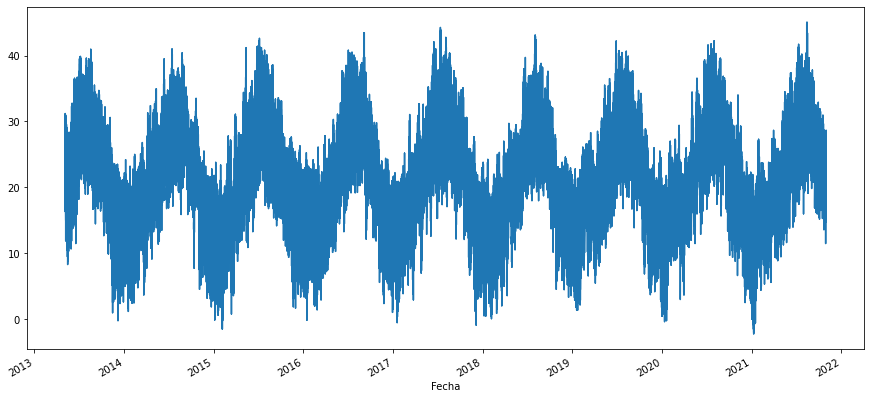

In [62]:
#Temperatures clearly look seasonal (which makes sense)

fig, ax = plt.subplots(figsize=(15,7))

all_weather_stations["Tmax"].plot(ax=ax)

mdates.RRuleLocator("o")

Now let's add the population info to the weather DataFrame so I can do the weighted average by population

In [63]:
population_path = "/home/dsc/CarpetaCompartida/TFM/Data/Precios de la electricidad/Cifras oficiales de población resultantes de la revisión del Padrón municipal 2020.csv"
population = pd.read_csv(population_path, dtype = str, engine= "python", sep=";", encoding= "latin1")

In [64]:
population[["Code", "Provincia"]] = population.Provincias.str.split(" ",1, expand=True)
population

,Provincias,Sexo,Periodo,Total,Code,Provincia
0,02 Albacete,Total,2020,388.270,02,Albacete
1,03 Alicante/Alacant,Total,2020,1.879.888,03,Alicante/Alacant
2,04 Almería,Total,2020,727.945,04,Almería
3,01 Araba/Álava,Total,2020,333.940,01,Araba/Álava
4,33 Asturias,Total,2020,1.018.784,33,Asturias
5,05 Ávila,Total,2020,157.664,05,Ávila
6,06 Badajoz,Total,2020,672.137,06,Badajoz
7,"07 Balears, Illes",Total,2020,1.171.543,07,"Balears, Illes"
8,08 Barcelona,Total,2020,5.743.402,08,Barcelona
9,48 Bizkaia,Total,2020,1.159.443,48,Bizkaia


In [65]:
population = population.drop(["Provincias", "Sexo", "Periodo", "Code"], axis = 1)
population

,Total,Provincia
0,388.270,Albacete
1,1.879.888,Alicante/Alacant
2,727.945,Almería
3,333.940,Araba/Álava
4,1.018.784,Asturias
5,157.664,Ávila
6,672.137,Badajoz
7,1.171.543,"Balears, Illes"
8,5.743.402,Barcelona
9,1.159.443,Bizkaia


I need to check if all provinces name are the same between the population DataFrame and the weather DataFrame. If some names are different, I will rename them so both are the same in both DataFrames and I can easily work with them

In [66]:
population["Provincia"].unique()

array(['Albacete', 'Alicante/Alacant', 'Almería', 'Araba/Álava',
       'Asturias', 'Ávila', 'Badajoz', 'Balears, Illes', 'Barcelona',
       'Bizkaia', 'Burgos', 'Cáceres', 'Cádiz', 'Cantabria',
       'Castellón/Castelló', 'Ciudad Real', 'Córdoba', 'Coruña, A',
       'Cuenca', 'Gipuzkoa', 'Girona', 'Granada', 'Guadalajara', 'Huelva',
       'Huesca', 'Jaén', 'León', 'Lleida', 'Lugo', 'Madrid', 'Málaga',
       'Murcia', 'Navarra', 'Ourense', 'Palencia', 'Palmas, Las',
       'Pontevedra', 'Rioja, La', 'Salamanca', 'Santa Cruz de Tenerife',
       'Segovia', 'Sevilla', 'Soria', 'Tarragona', 'Teruel', 'Toledo',
       'Valencia/València', 'Valladolid', 'Zamora', 'Zaragoza', 'Ceuta',
       'Melilla'], dtype=object)

In [67]:
all_weather_stations["Provincia"].unique()

array(['A Coruña', 'Alacant/Alicante', 'Albacete', 'Almería',
       'Araba/Álava', 'Asturias', 'Badajoz', 'Barcelona', 'Bizkaia',
       'Burgos', 'Cantabria', 'Castelló/Castellón', 'Ceuta',
       'Ciudad Real', 'Cuenca', 'Cáceres', 'Cádiz', 'Córdoba', 'Gipuzkoa',
       'Girona', 'Granada', 'Guadalajara', 'Huelva', 'Huesca',
       'Illes Balears', 'Jaén', 'La Rioja', 'Las Palmas', 'León',
       'Lleida', 'Lugo', 'Madrid', 'Murcia', 'Málaga', 'Navarra',
       'Ourense', 'Palencia', 'Pontevedra', 'Salamanca',
       'Santa Cruz de Tenerife', 'Segovia', 'Sevilla', 'Soria',
       'Tarragona', 'Teruel', 'Toledo', 'Valladolid', 'València/Valencia',
       'Zamora', 'Zaragoza', 'Ávila', 'Melilla'], dtype=object)

In [68]:
provincias_weather = all_weather_stations["Provincia"]
provincias_weather = pd.DataFrame(provincias_weather)

In [69]:
#So there are 7 provinces that are called slighty different between the 2.

different_names = population.merge(right = provincias_weather, how= "left", indicator=True)

different_names = different_names[different_names['_merge']=='left_only']
different_names

,Total,Provincia,_merge
3082,1.879.888,Alicante/Alacant,left_only
18508,1.171.543,"Balears, Illes",left_only
37033,585.590,Castellón/Castelló,left_only
43210,1.121.815,"Coruña, A",left_only
95697,1.131.065,"Palmas, Las",left_only
98784,319.914,"Rioja, La",left_only
123484,2.591.875,Valencia/València,left_only


I'm going to change the name for all the 7 provinces, even if some of them won't be used in my models because they're not part of the Spanish peninsula. I'll get rid of those later.

In [70]:
#I'm changing the name in the population dataframe so it matches the weather stations one, for those that are not the same
population.loc[17, "Provincia"] = "A Coruña"
population.loc[1, "Provincia"] = "Alacant/Alicante"
population.loc[14, "Provincia"] = "Castelló/Castellón"
population.loc[37, "Provincia"] = "La Rioja"
population.loc[46, "Provincia"] = "València/Valencia"
population.loc[7, "Provincia"] = "Illes Balears"
population.loc[35, "Provincia"] = "Las Palmas"

In [71]:
#The reset index here is because otherwise I lose the Date when I do the merge (and I really don't want that...)

all_weather_stations.reset_index(inplace= True)
all_weather_stations_population = all_weather_stations.merge(right= population, on= "Provincia", how= "left")

In [72]:
all_weather_stations_population.rename(columns= {"Total": "Población"}, inplace=True)
all_weather_stations_population.head()

,Fecha,Provincia,Tmax,Tmin,Tmed,Vmax,TPrec,Población
0,2013-05-07,A Coruña,17.650000,12.950000,15.049999,35.0,9.6,1.121.815
1,2013-05-07,Alacant/Alicante,29.299999,17.400000,23.200001,18.5,0.0,1.879.888
2,2013-05-07,Albacete,25.450001,13.450001,19.750000,15.0,0.0,388.270
3,2013-05-07,Almería,24.250000,16.200001,20.950001,19.5,0.0,727.945
4,2013-05-07,Araba/Álava,21.100000,13.300000,17.200001,18.0,0.8,333.940


In [73]:
#Checking once more that there are no NaN values now
all_weather_stations_population.isnull().any()

Fecha        False
Provincia    False
Tmax         False
Tmin         False
Tmed         False
Vmax         False
TPrec        False
Población    False
dtype: bool

Before I do the weighted average by population so I get to 1 row by day, I need to remove all those Provinces that are not part of the Spanish peninsula (Balearic and Canary Islands, Ceuta and Melilla)

In [74]:
indexOut1 = all_weather_stations_population[(all_weather_stations_population["Provincia"] == "Ceuta")].index
indexOut2 = all_weather_stations_population[(all_weather_stations_population["Provincia"] == "Illes Balears")].index
indexOut3 = all_weather_stations_population[(all_weather_stations_population["Provincia"] == "Las Palmas")].index
indexOut4 = all_weather_stations_population[(all_weather_stations_population["Provincia"] == "Melilla")].index
indexOut5 = all_weather_stations_population[(all_weather_stations_population["Provincia"] == "Santa Cruz de Tenerife")].index

indexOut = indexOut1.append([indexOut2, indexOut3, indexOut4, indexOut5])

all_weather_stations_population.drop(indexOut, inplace= True)

In [75]:
all_weather_stations_population.head()

,Fecha,Provincia,Tmax,Tmin,Tmed,Vmax,TPrec,Población
0,2013-05-07,A Coruña,17.650000,12.950000,15.049999,35.0,9.6,1.121.815
1,2013-05-07,Alacant/Alicante,29.299999,17.400000,23.200001,18.5,0.0,1.879.888
2,2013-05-07,Albacete,25.450001,13.450001,19.750000,15.0,0.0,388.270
3,2013-05-07,Almería,24.250000,16.200001,20.950001,19.5,0.0,727.945
4,2013-05-07,Araba/Álava,21.100000,13.300000,17.200001,18.0,0.8,333.940


In [76]:
#In here I'm just checking that in fact all those provinces have been deleted
ce = all_weather_stations_population["Provincia"] == "Ceuta"
ba = all_weather_stations_population["Provincia"] == "Illes Balears"
pa = all_weather_stations_population["Provincia"] == "Las Palmas"
me =all_weather_stations_population["Provincia"] == "Melilla"
te = all_weather_stations_population["Provincia"] == "Santa Cruz de Tenerife"

print(np.count_nonzero(ce), np.count_nonzero(ba), np.count_nonzero(pa), np.count_nonzero(me), np.count_nonzero(te))


0 0 0 0 0


In [77]:
all_weather_stations_population.dtypes

Fecha        datetime64[ns]
Provincia            object
Tmax                float32
Tmin                float32
Tmed                float32
Vmax                float32
TPrec               float32
Población            object
dtype: object

In [78]:
all_weather_stations_population['Población'] = all_weather_stations_population['Población'].str.replace('.', '')

In [79]:
all_weather_stations_population["Población"] = pd.to_numeric(all_weather_stations_population["Población"], downcast="float")

To be able to do the weighted average by population, I'm going to use the following functions:

In [80]:
def grouped_weighted_avg_Tmax(values, weights, by):
    return pd.DataFrame((values * weights).groupby(by).sum() / weights.groupby(by).sum(), columns= ["Tmax"])

def grouped_weighted_avg_Tmin(values, weights, by):
    return pd.DataFrame((values * weights).groupby(by).sum() / weights.groupby(by).sum(), columns= ["Tmin"])

def grouped_weighted_avg_Tmed(values, weights, by):
    return pd.DataFrame((values * weights).groupby(by).sum() / weights.groupby(by).sum(), columns= ["Tmed"])

def grouped_weighted_avg_Vmax(values, weights, by):
    return pd.DataFrame((values * weights).groupby(by).sum() / weights.groupby(by).sum(), columns= ["Vmax"])

def grouped_weighted_avg_Tprec(values, weights, by):
    return pd.DataFrame((values * weights).groupby(by).sum() / weights.groupby(by).sum(), columns= ["TPrec"])

In [81]:
weighted_av_Tmax = grouped_weighted_avg_Tmax(values= all_weather_stations_population["Tmax"],
                                 weights= all_weather_stations_population["Población"],
                                 by= all_weather_stations_population["Fecha"])
weighted_av_Tmin = grouped_weighted_avg_Tmin(values= all_weather_stations_population["Tmin"],
                                 weights= all_weather_stations_population["Población"],
                                 by= all_weather_stations_population["Fecha"])
weighted_av_Tmed = grouped_weighted_avg_Tmed(values= all_weather_stations_population["Tmed"],
                                 weights= all_weather_stations_population["Población"],
                                 by= all_weather_stations_population["Fecha"])
weighted_av_Vmax = grouped_weighted_avg_Vmax(values= all_weather_stations_population["Vmax"],
                                 weights= all_weather_stations_population["Población"],
                                 by= all_weather_stations_population["Fecha"])
weighted_av_Tprec = grouped_weighted_avg_Tprec(values= all_weather_stations_population["TPrec"],
                                 weights= all_weather_stations_population["Población"],
                                 by= all_weather_stations_population["Fecha"])


In [82]:
weather_variables_list = [weighted_av_Tmax, weighted_av_Tmin, weighted_av_Tmed,
                          weighted_av_Vmax, weighted_av_Tprec]

weather_variables = weather_variables_list[0].join(weather_variables_list[1:])
weather_variables.head()

,Tmax,Tmin,Tmed,Vmax,TPrec
Fecha,,,,,
2013-05-07,24.372623,13.598554,19.108723,17.469931,0.548212
2013-05-08,24.171618,13.924416,19.068588,16.027378,0.335008
2013-05-09,23.007523,13.323574,18.142879,17.443392,2.003548
2013-05-10,22.321642,12.264773,17.353886,17.460852,0.044821
2013-05-11,21.945469,10.597996,16.243876,17.480986,0.000000


In [83]:
weather_variables.rename_axis("Date", axis= "index", inplace=True)
weather_variables

,Tmax,Tmin,Tmed,Vmax,TPrec
Date,,,,,
2013-05-07,24.372623,13.598554,19.108723,17.469931,0.548212
2013-05-08,24.171618,13.924416,19.068588,16.027378,0.335008
2013-05-09,23.007523,13.323574,18.142879,17.443392,2.003548
2013-05-10,22.321642,12.264773,17.353886,17.460852,0.044821
2013-05-11,21.945469,10.597996,16.243876,17.480986,0.000000
...,...,...,...,...,...
2021-10-27,21.642666,7.957000,14.881641,12.476789,0.035437
2021-10-28,20.944525,8.384373,14.828742,16.034164,1.280843
2021-10-29,18.843708,11.570926,15.215553,18.792376,5.418101


### Combining weather data to electricity and Brent prices dataframe
Now, let's add all the weather variables to the dataframe with the electricity and Brent prices

In [84]:
electricity_brent.set_index("Date", inplace=True)

In [85]:
electricity_brent.drop("Periodo", inplace= True, axis= 1)

In [86]:
electricity_brent.columns

Index(['Energía\n final \nMWh', 'Mercado \ndiario \n€/MWh',
       'Mercado \nintradiario \n€/MWh', 'Restricciones\n€/MWh',
       'Procesos \nOS \n€/MWh', 'Garantía potencia \nPagos capacidad\n€/MWh',
       'Total\n€/MWh', 'Coste\ns.interrrumpibilidad', 'Day', 'Último',
       'Apertura', 'Máximo', 'Mínimo', 'Vol.'],
      dtype='object')

Let's rename the columns so they make more sense

In [87]:
electricity_brent.rename(columns= {"Energía\n final \nMWh": "Energía final MWh", 
                                  "Mercado \ndiario \n€/MWh": "Mercado diario €/MWh",
                                 "Mercado \nintradiario \n€/MWh": "Mercado intradiario €/MWh",
                                 "Restricciones\n€/MWh": "Restricciones €/MWh",
                                 "Procesos \nOS \n€/MWh": "Procesos OS €/MWh",
                                 "Garantía potencia \nPagos capacidad\n€/MWh": "Garantía potencia Pagos capacidad €/MWh",
                                 "Total\n€/MWh": "Total €/MWh", "Coste\ns.interrrumpibilidad":"Coste s.interrrumpibilidad",
                                   "Último": "Precio cierre Brent", 
                                   "Apertura": "Precio apertura Brent","Máximo": "Precio Máximo Brent",
                                   "Mínimo": "Precio mínimo Brent", "Vol.": "N. de operaciones del día"}, 
                         inplace=True)

In [88]:
electricity_brent.head()

,Energía final MWh,Mercado diario €/MWh,Mercado intradiario €/MWh,Restricciones €/MWh,Procesos OS €/MWh,Garantía potencia Pagos capacidad €/MWh,Total €/MWh,Coste s.interrrumpibilidad,Day,Precio cierre Brent,Precio apertura Brent,Precio Máximo Brent,Precio mínimo Brent,N. de operaciones del día
Date,,,,,,,,,,,,,,
2013-01-02,681911.324,50.75,0.12,3.15,3.18,7.46,64.65,NaN,Miércoles,"112,47","111,50","112,90","111,27","183,14K"
2013-01-03,724426.458,57.07,-0.13,1.92,3.47,7.34,69.67,NaN,Jueves,"112,14","112,20","112,42","111,63","190,29K"
2013-01-04,717141.532,61.31,-0.08,1.71,2.4,7.39,72.73,NaN,Viernes,"111,31","111,72","111,78","110,38","191,33K"
2013-01-05,682149.96,58.11,0.14,1.29,1.43,4.88,65.86,NaN,Sábado,"111,31","111,72","111,78","110,38","191,33K"
2013-01-06,647854.785,58.01,0,2.27,2.16,5.02,67.45,NaN,Domingo,"111,31","111,72","111,78","110,38","191,33K"


In [89]:
electricity_brent_weather = electricity_brent.merge(weather_variables, on = "Date")
electricity_brent_weather

,Energía final MWh,Mercado diario €/MWh,Mercado intradiario €/MWh,Restricciones €/MWh,Procesos OS €/MWh,Garantía potencia Pagos capacidad €/MWh,Total €/MWh,Coste s.interrrumpibilidad,Day,Precio cierre Brent,Precio apertura Brent,Precio Máximo Brent,Precio mínimo Brent,N. de operaciones del día,Tmax,Tmin,Tmed,Vmax,TPrec
Date,,,,,,,,,,,,,,,,,,,
2013-05-07,711755.115,45.17,-0.3,2.29,0.59,5.2,52.95,NaN,Martes,"104,40","105,40","105,94","104,00","264,56K",24.372623,13.598554,19.108723,17.469931,0.548212
2013-05-08,706886.07,50.05,-0.48,3.03,1.13,5.23,58.96,NaN,Miércoles,"104,34","104,11","104,80","103,53","229,32K",24.171618,13.924416,19.068588,16.027378,0.335008
2013-05-09,712014.927,51.04,-0.41,1.34,0.76,5.2,57.94,NaN,Jueves,"104,47","104,44","104,60","103,45","197,07K",23.007523,13.323574,18.142879,17.443392,2.003548
2013-05-10,707860.407,46.06,-0.18,1.35,1.23,5.18,53.64,NaN,Viernes,"103,91","104,35","104,45","101,56","215,45K",22.321642,12.264773,17.353886,17.460852,0.044821
2013-05-11,623204.71,46.15,-0.29,2.4,1.23,4.11,53.6,NaN,Sábado,"103,91","104,35","104,45","101,56","215,45K",21.945469,10.597996,16.243876,17.480986,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-26,624704.121,159.19,-0.14,2.64,1.14,NaN,162.84,NaN,Domingo,"78,09","77,26","78,24","76,85","163,23K",25.917536,13.975994,20.005056,14.563063,0.008498
2021-09-27,684730.138,176.13,-0.25,2.23,0.54,0.38,179.04,NaN,Lunes,"79,53","78,25","79,90","78,21","231,13K",26.475058,13.456256,20.099070,14.319683,0.411610
2021-09-28,683173.232,182.57,-0.11,1.79,0.74,0.39,185.38,NaN,Martes,"79,09","79,40","80,75","78,10","132,33K",25.375231,13.199469,19.425434,15.960168,0.025154


In [90]:
electricity_brent_weather.dtypes

Energía final MWh                           object
Mercado diario €/MWh                        object
Mercado intradiario €/MWh                   object
Restricciones €/MWh                         object
Procesos OS €/MWh                           object
Garantía potencia Pagos capacidad €/MWh     object
Total €/MWh                                 object
Coste s.interrrumpibilidad                  object
Day                                         object
Precio cierre Brent                         object
Precio apertura Brent                       object
Precio Máximo Brent                         object
Precio mínimo Brent                         object
N. de operaciones del día                   object
Tmax                                       float32
Tmin                                       float32
Tmed                                       float32
Vmax                                       float32
TPrec                                      float32
dtype: object

Let's replace dots and commas accordingly in the dataframe. Dots should be used for decimals separators, and commas as thousands separators. Also, let's convert all numerics values to numeric type.
I'm also going to delete the column referring to the number of contracts sold that day in the Brent oil future market as I don't think this is relevant

In [91]:
electricity_brent_weather['Precio cierre Brent'] = electricity_brent_weather["Precio cierre Brent"].str.replace(",", ".")
electricity_brent_weather['Precio apertura Brent'] = electricity_brent_weather["Precio apertura Brent"].str.replace(",", ".")
electricity_brent_weather['Precio Máximo Brent'] = electricity_brent_weather["Precio Máximo Brent"].str.replace(",", ".")
electricity_brent_weather['Precio mínimo Brent'] = electricity_brent_weather["Precio mínimo Brent"].str.replace(",", ".")

In [92]:
electricity_brent_weather["Energía final MWh"] = pd.to_numeric(electricity_brent_weather["Energía final MWh"], downcast="float")
electricity_brent_weather["Mercado diario €/MWh"] = pd.to_numeric(electricity_brent_weather["Mercado diario €/MWh"], downcast="float")
electricity_brent_weather["Mercado intradiario €/MWh"] = pd.to_numeric(electricity_brent_weather["Mercado intradiario €/MWh"], downcast="float")
electricity_brent_weather["Restricciones €/MWh"] = pd.to_numeric(electricity_brent_weather["Restricciones €/MWh"], downcast="float")
electricity_brent_weather["Procesos OS €/MWh"] = pd.to_numeric(electricity_brent_weather["Procesos OS €/MWh"], downcast="float")
electricity_brent_weather["Garantía potencia Pagos capacidad €/MWh"] = pd.to_numeric(electricity_brent_weather["Garantía potencia Pagos capacidad €/MWh"], downcast="float")
electricity_brent_weather["Total €/MWh"] = pd.to_numeric(electricity_brent_weather["Total €/MWh"], downcast="float")
electricity_brent_weather["Coste s.interrrumpibilidad"] = pd.to_numeric(electricity_brent_weather["Coste s.interrrumpibilidad"], downcast="float")
electricity_brent_weather["Precio cierre Brent"] = pd.to_numeric(electricity_brent_weather["Precio cierre Brent"], downcast="float")
electricity_brent_weather["Precio apertura Brent"] = pd.to_numeric(electricity_brent_weather["Precio apertura Brent"], downcast="float")
electricity_brent_weather["Precio Máximo Brent"] = pd.to_numeric(electricity_brent_weather["Precio Máximo Brent"], downcast="float")
electricity_brent_weather["Precio mínimo Brent"] = pd.to_numeric(electricity_brent_weather["Precio mínimo Brent"], downcast="float")

In [93]:
electricity_brent_weather.drop(columns="N. de operaciones del día", inplace= True)

The variable "Coste s.interrrumpibilidad" is only there from February 2014. Therefore, let's replace the NaN values in that column with 0 for the period before February 2014

In [94]:
electricity_brent_weather.isnull().any()

Energía final MWh                          False
Mercado diario €/MWh                       False
Mercado intradiario €/MWh                  False
Restricciones €/MWh                        False
Procesos OS €/MWh                          False
Garantía potencia Pagos capacidad €/MWh     True
Total €/MWh                                False
Coste s.interrrumpibilidad                  True
Day                                        False
Precio cierre Brent                        False
Precio apertura Brent                      False
Precio Máximo Brent                        False
Precio mínimo Brent                        False
Tmax                                       False
Tmin                                       False
Tmed                                       False
Vmax                                       False
TPrec                                      False
dtype: bool

In [95]:
electricity_brent_weather.fillna(0, inplace= True)
electricity_brent_weather.isnull().any()

Energía final MWh                          False
Mercado diario €/MWh                       False
Mercado intradiario €/MWh                  False
Restricciones €/MWh                        False
Procesos OS €/MWh                          False
Garantía potencia Pagos capacidad €/MWh    False
Total €/MWh                                False
Coste s.interrrumpibilidad                 False
Day                                        False
Precio cierre Brent                        False
Precio apertura Brent                      False
Precio Máximo Brent                        False
Precio mínimo Brent                        False
Tmax                                       False
Tmin                                       False
Tmed                                       False
Vmax                                       False
TPrec                                      False
dtype: bool

In [96]:
electricity_brent_weather.describe()

,Energía final MWh,Mercado diario €/MWh,Mercado intradiario €/MWh,Restricciones €/MWh,Procesos OS €/MWh,Garantía potencia Pagos capacidad €/MWh,Total €/MWh,Coste s.interrrumpibilidad,Precio cierre Brent,Precio apertura Brent,Precio Máximo Brent,Precio mínimo Brent,Tmax,Tmin,Tmed,Vmax,TPrec
count,3058.000000,3058.000000,3058.000000,3058.000000,3058.000000,3058.000000,3058.000000,3058.000000,3058.000000,3058.000000,3058.000000,3058.000000,3058.000000,3058.000000,3058.000000,3058.000000,3058.000000
mean,726717.000000,49.793140,-0.037783,2.094117,0.911609,3.196756,56.832611,0.874572,65.863853,65.849419,66.681725,64.976433,21.621479,10.357594,16.050243,18.181652,1.289079
std,64736.109375,19.642447,0.112291,1.233645,0.724880,1.636478,19.165722,0.806890,22.089151,22.055536,22.010469,22.102324,6.967909,5.576478,6.190802,4.074280,2.243581
min,549004.000000,0.550000,-1.200000,0.090000,0.000000,0.000000,5.940000,0.000000,19.330000,19.900000,21.290001,15.980000,5.110117,-3.613261,1.278752,9.203861,0.000000
25%,684844.031250,40.132501,-0.070000,1.210000,0.420000,2.130000,46.959999,0.000000,49.927499,49.900002,50.700001,48.912499,15.429363,5.633858,10.649288,15.694632,0.015403
50%,726215.656250,48.830000,-0.020000,1.910000,0.700000,2.530000,56.099998,0.730000,62.050001,61.945000,62.869999,60.939999,21.433083,10.144262,15.827930,17.667819,0.318718
75%,772060.265625,57.917499,0.010000,2.720000,1.170000,3.987500,65.404999,1.750000,74.217501,74.252502,74.977503,73.185001,27.660263,15.388235,21.538238,19.952763,1.563426
max,927416.187500,191.350006,0.940000,10.160000,8.010000,7.820000,196.179993,2.210000,116.610001,115.930000,117.339996,115.019997,37.282612,21.400871,29.218250,39.631035,21.939543


### Finding outliers

In [97]:
#pip install --upgrade tsmoothie

In [98]:
from tsmoothie.utils_func import sim_randomwalk
from tsmoothie.smoother import LowessSmoother

data = electricity_brent_weather['Total €/MWh'].values.reshape(1, -1)

# operate smoothing
smoother = LowessSmoother(smooth_fraction=0.1, iterations=1)
smoother.smooth(data)

# generate intervals
low, up = smoother.get_intervals('prediction_interval')

points = smoother.data[0]
up_points = up[0]
low_points = low[0]

for i in range(len(points)-1, 0, -1):
    current_point = points[i]
    current_up = up_points[i]
    current_low = low_points[i]
    if current_point > current_up or current_point < current_low:
        print(f'found an outlier value: {current_point}')

found an outlier value: 196.00999450683594
found an outlier value: 196.17999267578125
found an outlier value: 185.3800048828125
found an outlier value: 179.0399932861328
found an outlier value: 168.0399932861328
found an outlier value: 176.42999267578125
found an outlier value: 169.0399932861328
found an outlier value: 179.57000732421875
found an outlier value: 162.4499969482422
found an outlier value: 163.63999938964844
found an outlier value: 171.32000732421875
found an outlier value: 191.61000061035156
found an outlier value: 177.8000030517578
found an outlier value: 159.0500030517578
found an outlier value: 158.11000061035156
found an outlier value: 156.0500030517578
found an outlier value: 107.44000244140625
found an outlier value: 99.5199966430664
found an outlier value: 99.83000183105469
found an outlier value: 90.81999969482422
found an outlier value: 68.69000244140625
found an outlier value: 82.83000183105469
found an outlier value: 64.88999938964844
found an outlier value: 76

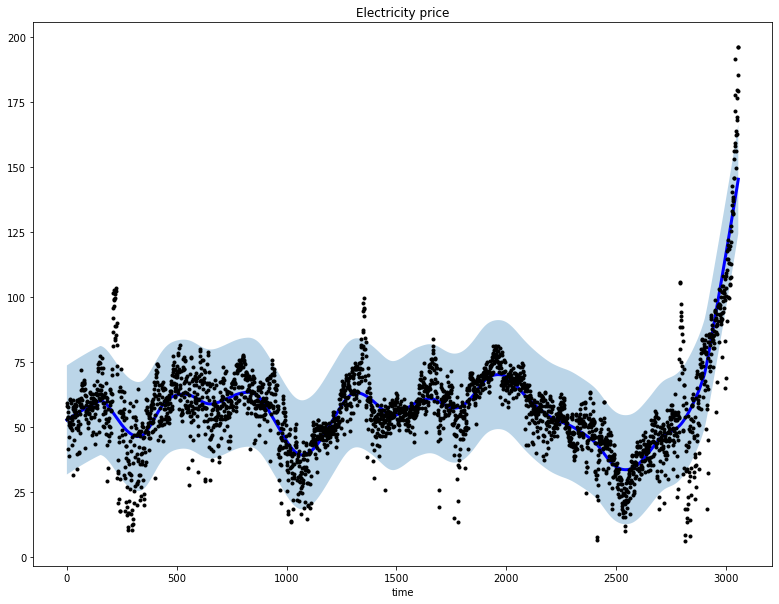

In [99]:
# plot the smoothed timeseries with intervals
plt.figure(figsize=(45,10))

for i in range(1):
    
    plt.subplot(1,3,i+1)
    plt.plot(smoother.smooth_data[i], linewidth=3, color='blue')
    plt.plot(smoother.data[i], '.k')
    plt.title(f"Electricity price"); plt.xlabel('time')

    plt.fill_between(range(len(smoother.data[i])), low[i], up[i], alpha=0.3)

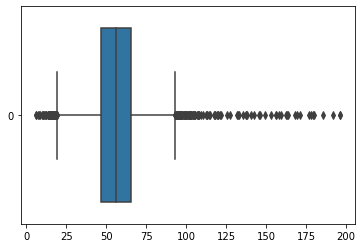

In [100]:
ax = sns.boxplot(data=electricity_brent_weather["Total €/MWh"], orient="h")

From the plot above, it can be seen that values above 100 are categorised as outliers in the boxplot, same with values under 25 ish.

What I am going to do, is in cases where the absolute value between the price value and the mean of the series is above 3 times higher than the standard deviation of the series, replace those values with a value that is the median of the series.

I will then train the models with both datasets (handling outliers and leaving values as they are), and compare which one work best.

In [101]:
electricity_price = pd.Series(electricity_brent_weather["Total €/MWh"])

In [102]:
electricity_price.dtypes

dtype('float32')

In [103]:
absolute_differences_from_mean = np.abs(electricity_price - np.mean(electricity_price))
absolute_differences_from_mean

Date
2013-05-07      3.882610
2013-05-08      2.127388
2013-05-09      1.107388
2013-05-10      3.192612
2013-05-11      3.232613
                 ...    
2021-09-26    106.007385
2021-09-27    122.207382
2021-09-28    128.547394
2021-09-29    139.347382
2021-09-30    139.177383
Name: Total €/MWh, Length: 3058, dtype: float32

In [104]:
(np.std(electricity_price) * 3)

57.48776435852051

In [105]:
np.nanmedian(electricity_price)

56.1

In [106]:
absolute_differences_from_mean > (np.std(electricity_price) * 3)

Date
2013-05-07    False
2013-05-08    False
2013-05-09    False
2013-05-10    False
2013-05-11    False
              ...  
2021-09-26     True
2021-09-27     True
2021-09-28     True
2021-09-29     True
2021-09-30     True
Name: Total €/MWh, Length: 3058, dtype: bool

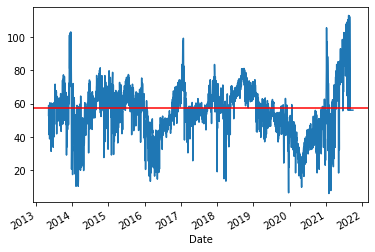

In [107]:
electricity_price_no_outliers = electricity_price.copy()

# Calculate the absolute difference of each timepoint from the series mean
absolute_differences_from_mean = np.abs(electricity_price - np.mean(electricity_price))
    
# Calculate a mask for the differences that are > 3 standard deviations from zero

three_std =(np.std(electricity_price) * 3)
    
this_mask = absolute_differences_from_mean > three_std
    
# Replace these values with the median across the data
electricity_price_no_outliers[this_mask] = np.nanmedian(electricity_price)

# Apply your preprocessing function to the timeseries and plot the results
electricity_price_no_outliers.loc["2013":"2021"].plot()
plt.axhline(y = three_std, color ='r', linestyle = '-')
plt.show()

In [108]:
absolute_differences_from_mean = np.abs(electricity_price - np.mean(electricity_price))
np.nonzero(np.array(absolute_differences_from_mean > (np.std(electricity_price) * 3)))

(array([3006, 3007, 3008, 3009, 3010, 3011, 3015, 3016, 3021, 3022, 3023,
        3026, 3027, 3028, 3029, 3030, 3031, 3032, 3033, 3034, 3035, 3036,
        3037, 3038, 3039, 3040, 3041, 3042, 3043, 3044, 3045, 3046, 3047,
        3048, 3049, 3050, 3051, 3052, 3053, 3054, 3055, 3056, 3057]),)

In [109]:
electricity_price_no_outliers = pd.DataFrame(electricity_price_no_outliers)
electricity_price = pd.DataFrame(electricity_price)

In [110]:
check = electricity_price_no_outliers.merge(right= electricity_prices, on= "Date", how= "left")
check.head()

,Date,Total €/MWh,Periodo,Energía\n final \nMWh,Mercado \ndiario \n€/MWh,Mercado \nintradiario \n€/MWh,Restricciones\n€/MWh,Procesos \nOS \n€/MWh,Garantía potencia \nPagos capacidad\n€/MWh,Total\n€/MWh,Coste\ns.interrrumpibilidad,Day
0,2013-05-07,52.950001,07/05/13 Martes,711755.115,45.17,-0.3,2.29,0.59,5.2,52.95,NaN,Martes
1,2013-05-08,58.959999,08/05/13 Miércoles,706886.07,50.05,-0.48,3.03,1.13,5.23,58.96,NaN,Miércoles
2,2013-05-09,57.939999,09/05/13 Jueves,712014.927,51.04,-0.41,1.34,0.76,5.2,57.94,NaN,Jueves
3,2013-05-10,53.639999,10/05/13 Viernes,707860.407,46.06,-0.18,1.35,1.23,5.18,53.64,NaN,Viernes
4,2013-05-11,53.599998,11/05/13 Sábado,623204.71,46.15,-0.29,2.4,1.23,4.11,53.6,NaN,Sábado


In [111]:
check.drop(["Energía\n final \nMWh", "Mercado \ndiario \n€/MWh", "Mercado \nintradiario \n€/MWh", "Restricciones\n€/MWh",
                  "Procesos \nOS \n€/MWh", "Garantía potencia \nPagos capacidad\n€/MWh", "Coste\ns.interrrumpibilidad"],
                 inplace = True, axis = 1)

check["Total €/MWh"] = pd.to_numeric(check["Total €/MWh"], downcast="float")
check["Total\n€/MWh"] = pd.to_numeric(check["Total\n€/MWh"], downcast="float")

check.rename({"Total €/MWh":"Total €/MWh no outliers", "Total\n€/MWh":"Total €/MWh original"}, axis=1, inplace= True)

In [112]:
check['Difference'] = check.apply(
    lambda x: x['Total €/MWh no outliers'] - x['Total €/MWh original'], axis = 1)

In [113]:
check

,Date,Total €/MWh no outliers,Periodo,Total €/MWh original,Day,Difference
0,2013-05-07,52.950001,07/05/13 Martes,52.950001,Martes,0.000000
1,2013-05-08,58.959999,08/05/13 Miércoles,58.959999,Miércoles,0.000000
2,2013-05-09,57.939999,09/05/13 Jueves,57.939999,Jueves,0.000000
3,2013-05-10,53.639999,10/05/13 Viernes,53.639999,Viernes,0.000000
4,2013-05-11,53.599998,11/05/13 Sábado,53.599998,Sábado,0.000000
...,...,...,...,...,...,...
3053,2021-09-26,56.099998,26/09/21 Domingo,162.839996,Domingo,-106.739998
3054,2021-09-27,56.099998,27/09/21 Lunes,179.039993,Lunes,-122.939995
3055,2021-09-28,56.099998,28/09/21 Martes,185.380005,Martes,-129.280006
3056,2021-09-29,56.099998,29/09/21 Miércoles,196.179993,Miércoles,-140.079994


In [114]:
check.describe()

,Total €/MWh no outliers,Total €/MWh original,Difference
count,3058.000000,3058.000000,3058.000000
mean,55.539059,56.832611,-1.293548
std,15.502096,19.165722,11.205277
min,5.940000,5.940000,-140.079994
25%,46.959999,46.959999,0.000000
50%,56.099998,56.099998,0.000000
75%,64.769997,65.404999,0.000000
max,113.129997,196.179993,0.000000


In [115]:
electricity_brent_weather_no_outliers = electricity_price_no_outliers.merge(right= electricity_brent_weather, on= "Date", how= "left")
electricity_brent_weather_no_outliers.tail()

,Total €/MWh_x,Energía final MWh,Mercado diario €/MWh,Mercado intradiario €/MWh,Restricciones €/MWh,Procesos OS €/MWh,Garantía potencia Pagos capacidad €/MWh,Total €/MWh_y,Coste s.interrrumpibilidad,Day,Precio cierre Brent,Precio apertura Brent,Precio Máximo Brent,Precio mínimo Brent,Tmax,Tmin,Tmed,Vmax,TPrec
Date,,,,,,,,,,,,,,,,,,,
2021-09-26,56.099998,624704.1250,159.190002,-0.14,2.64,1.14,0.00,162.839996,0.0,Domingo,78.089996,77.260002,78.239998,76.849998,25.917536,13.975994,20.005056,14.563063,0.008498
2021-09-27,56.099998,684730.1250,176.130005,-0.25,2.23,0.54,0.38,179.039993,0.0,Lunes,79.529999,78.250000,79.900002,78.209999,26.475058,13.456256,20.099070,14.319683,0.411610
2021-09-28,56.099998,683173.2500,182.570007,-0.11,1.79,0.74,0.39,185.380005,0.0,Martes,79.089996,79.400002,80.750000,78.099998,25.375231,13.199469,19.425434,15.960168,0.025154
2021-09-29,56.099998,698517.5000,190.619995,-0.28,3.99,1.46,0.38,196.179993,0.0,Miércoles,78.639999,78.250000,79.400002,77.500000,25.286041,13.050295,19.229074,15.105579,0.161973
2021-09-30,56.099998,698203.4375,191.350006,0.06,3.12,1.09,0.38,196.009995,0.0,Jueves,78.519997,78.459999,79.110001,77.599998,25.037010,13.518993,19.368441,13.912442,0.010109


In [116]:
electricity_brent_weather_no_outliers.rename({"Total €/MWh_x":"Total €/MWh no outliers", 
                                              "Total €/MWh_y":"Total €/MWh original"}, axis=1, inplace= True)

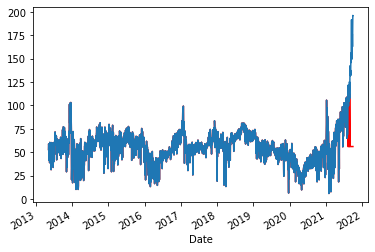

In [117]:
electricity_brent_weather_no_outliers["Total €/MWh no outliers"].plot(color = "red")
electricity_brent_weather_no_outliers["Total €/MWh original"].plot();

### Let's do some visualisations before I start using some models

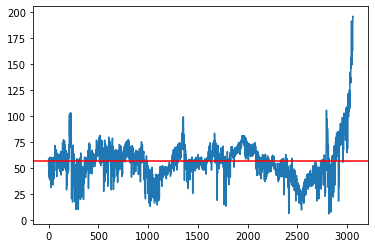

In [118]:
#At first sight, it doesn't look to me that the electricity prices depend on seasonality, but I'll investigate this later

media = electricity_brent_weather["Total €/MWh"].mean()

plt.plot(electricity_brent_weather["Total €/MWh"].values)
plt.axhline(y = media,color ='r', linestyle = '-')
plt.show()

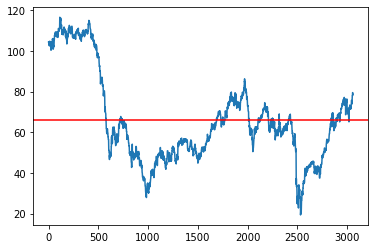

In [119]:
#Compared to the electricity prices,the Brent oil future prices look much less dependant on seasonality

media = electricity_brent_weather["Precio cierre Brent"].mean()

plt.plot(electricity_brent_weather["Precio cierre Brent"].values)
plt.axhline(y = media,color ='r', linestyle = '-')
plt.show()

In [120]:
months = electricity_brent_weather.resample("M").mean()
months

,Energía final MWh,Mercado diario €/MWh,Mercado intradiario €/MWh,Restricciones €/MWh,Procesos OS €/MWh,Garantía potencia Pagos capacidad €/MWh,Total €/MWh,Coste s.interrrumpibilidad,Precio cierre Brent,Precio apertura Brent,Precio Máximo Brent,Precio mínimo Brent,Tmax,Tmin,Tmed,Vmax,TPrec
Date,,,,,,,,,,,,,,,,,
2013-05-31,680088.6250,43.075600,-0.195200,3.443600,1.200000,4.943200,52.467602,0.0,103.411598,103.517998,104.028801,102.283203,20.059738,9.461501,14.843591,20.259188,1.413655
2013-06-30,691280.0625,41.467999,-0.235667,3.086000,1.497000,5.593000,51.407665,0.0,103.157333,103.168999,104.148666,102.165337,25.815681,13.017464,19.508736,18.670326,0.699364
2013-07-31,757750.8750,51.859032,-0.037419,1.263871,1.267097,6.573548,60.928066,0.0,107.559998,107.169357,108.048706,106.428711,31.171972,17.577093,24.457556,18.039492,0.254679
2013-08-31,705887.1250,48.723225,-0.073548,2.016452,1.386452,4.474839,56.526131,0.0,110.358391,109.903221,111.000000,109.267738,30.553507,17.467529,24.083385,17.851673,0.319438
2013-09-30,713595.0625,51.093334,-0.072333,2.319000,1.423333,4.957000,59.721001,0.0,111.461998,111.478668,112.320999,110.482666,27.135378,15.221637,21.295116,17.077494,0.731561
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-31,693762.5000,66.773224,-0.034516,2.586129,0.790323,2.000645,72.115486,0.0,68.229355,68.038712,68.872902,67.127739,22.982203,10.801744,17.002357,19.389046,0.983118
2021-06-30,695495.1250,83.223999,-0.026333,2.111667,0.678000,0.277333,86.266335,0.0,73.450668,73.104668,73.939331,72.488663,27.141052,14.867801,21.124292,18.577728,1.072972
2021-07-31,748930.5625,92.285164,-0.025806,2.097097,0.705484,0.492258,95.555481,0.0,74.503548,74.229034,75.195808,73.270325,30.578768,17.071466,23.891268,18.817171,0.225382


In [121]:
months.describe()

,Energía final MWh,Mercado diario €/MWh,Mercado intradiario €/MWh,Restricciones €/MWh,Procesos OS €/MWh,Garantía potencia Pagos capacidad €/MWh,Total €/MWh,Coste s.interrrumpibilidad,Precio cierre Brent,Precio apertura Brent,Precio Máximo Brent,Precio mínimo Brent,Tmax,Tmin,Tmed,Vmax,TPrec
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,726766.437500,49.690739,-0.038161,2.099331,0.913615,3.202693,56.740311,0.871896,65.940727,65.926567,66.759445,65.052353,21.575493,10.323819,16.010374,18.199091,1.294264
std,40428.839844,17.676563,0.049270,0.982314,0.593021,1.513910,17.224812,0.810722,22.141317,22.106663,22.064772,22.154356,6.523356,5.229664,5.871109,1.934555,0.848947
min,610884.625000,17.713333,-0.310968,0.513226,0.241935,0.277333,24.261333,0.000000,27.365334,27.713333,29.641666,25.717667,11.449321,1.768613,6.919828,13.237708,0.169755
25%,695703.125000,42.311001,-0.046774,1.270968,0.475333,2.199032,47.556774,0.000000,49.797333,49.914665,50.612000,48.925335,15.536676,5.632903,10.973165,17.220930,0.542735
50%,723235.750000,48.723225,-0.025806,2.090322,0.770667,2.734333,56.269287,0.719667,62.703667,62.419334,63.282333,61.667999,21.063246,10.363111,16.019806,18.221209,1.214016
75%,753297.187500,56.147743,-0.012000,2.750968,1.136129,4.474839,64.160332,1.749355,74.503548,74.229034,75.195808,73.270325,27.141052,15.109671,21.139954,19.204773,1.815861
max,818443.625000,156.207672,0.030645,5.480000,2.890000,6.744839,159.923004,2.109000,112.032669,111.991997,112.667664,111.406670,32.668228,19.156334,25.957901,25.483311,3.975250


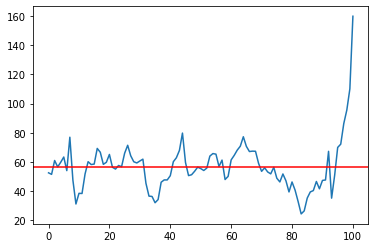

In [122]:
media = months["Total €/MWh"].mean()
plt.plot(months["Total €/MWh"].values)
plt.axhline(y = media, color ='r', linestyle = '-')

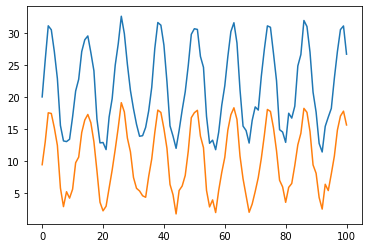

In [123]:
plt.plot(months["Tmax"].values)
plt.plot(months["Tmin"].values)

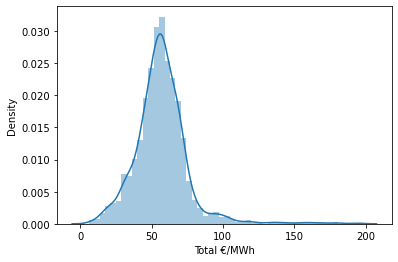

In [124]:
#It looks like the energy prices could follow a normal distribution
sns.distplot(electricity_brent_weather["Total €/MWh"]);

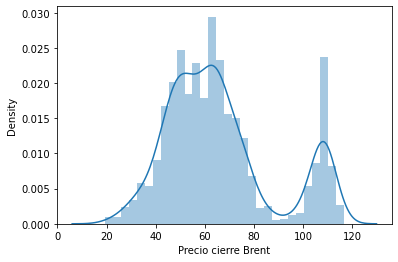

In [125]:
#It looks as if the Brent oil future prices followed 2 different distributions
sns.distplot(electricity_brent_weather["Precio cierre Brent"]);

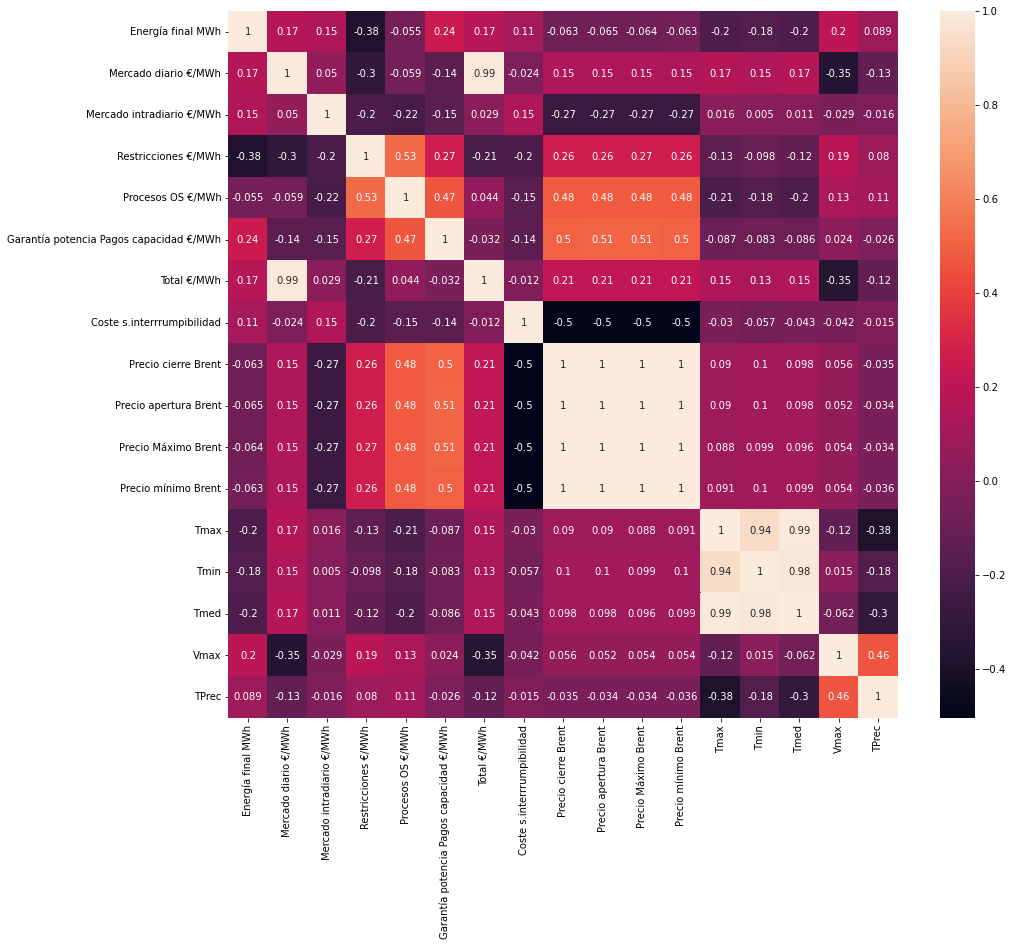

In [126]:
#In here we can see how all the variables are correlated
sns.heatmap(electricity_brent_weather.corr(), annot=True)
plt.gcf().set_size_inches(15,13)

Looking at the correlations, we can see that the Total electricity price is very strongly correlated with the price of "Mercado diario". This makes sense as both prices are practically the same, the only difference being that the Total one is adjusted by the price of "Mercado intradiario", "Restricciones", "Procesos OS", "Garantía potencia de pagos capacidad" and "Coste s. interrumpibilidad". It would make sense to not use all these variables when modelling, as they will lead to over-fitting.

The other variable that seem to be very correlated with the Total electricity price is the wind (Vmax), although both variables have a negative correlation. This means that when the gust of winds are stronger in a day, the electricity price goes down.

I will also drop the Median temperature when modeling, as it is strongly correlated with the Maximum and Minimum temperature and in regarding the Brent crude oil future prices, I'll only use the final price of the day (precio cierre Brent).

I'm going to save the electricity_brent_weather DataFrame and the electricity prices without outliers in a csv, so I can open it in another notebook if necessary. 

In [127]:
electricity_brent_weather.to_csv("electricity_brent_weather.csv", sep= ";", index = True)

In [128]:
electricity_price_no_outliers.to_csv("electricity_price_no_outliers.csv", sep= ";", index = True)

In [129]:
electricity_brent_weather_no_outliers.to_csv("electricity_brent_weather_no_outliers.csv", sep= ";", index = True)